In [11]:
!pip install pytorch-lightning==2.1.2
!pip install --upgrade torch torchvision torchaudio
# !pip install tensorboard

  Using cached pytorch_lightning-2.1.2-py3-none-any.whl.metadata (21 kB)
Using cached pytorch_lightning-2.1.2-py3-none-any.whl (776 kB)
  Attempting uninstall: pytorch-lightning
    Found existing installation: pytorch-lightning 1.5.6
    Uninstalling pytorch-lightning-1.5.6:
      Successfully uninstalled pytorch-lightning-1.5.6
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 9.6 MB/s eta 0:00:000m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 16.2 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 16.7 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1
    Uninstalling torch-1.13.1:
      Successfully uninstalled torch-1.13.1
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1
    Uninstalling torchvision-0.14.1:
      Successfully uninstalled torchvision-0.14.1
  Attempting uninstall: torchaudio
    Found ex

In [1]:
!pwd

/home/jasper/Documents/PhD/Y0/vae_sketch_to_sound/src


In [3]:
!git clone https://github.com/AntixK/PyTorch-VAE

Cloning into 'PyTorch-VAE'...
remote: Enumerating objects: 859, done.
remote: Total 859 (delta 0), reused 0 (delta 0), pack-reused 859
Receiving objects: 100% (859/859), 46.47 MiB | 531.00 KiB/s, done.
Resolving deltas: 100% (619/619), done.


## Train

In [1]:
%cd /home/jasper/Documents/PhD/Y0/vae_sketch_to_sound/src/PyTorchVAE

/home/jasper/Documents/PhD/Y0/vae_sketch_to_sound/src/PyTorchVAE


In [2]:
!pwd

import os
import yaml
import argparse
import numpy as np
from pathlib import Path
from models import *
from experiment import VAEXperiment
import torch.backends.cudnn as cudnn
from pytorch_lightning import Trainer
# from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.loggers import CSVLogger
# from pytorch_lightning.utilities.seed import seed_everything
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint
from dataset import VAEDataset
# from pytorch_lightning.plugins import DDPPlugin


/home/jasper/Documents/PhD/Y0/vae_sketch_to_sound/src/PyTorchVAE


In [3]:
# config_file = './configs/bhvae.yaml'
config_file = './configs/dfc_vae.yaml'

with open(config_file, 'r') as file:
    try:
        config = yaml.safe_load(file)
    except yaml.YAMLError as exc:
        print(exc)


# tb_logger =  TensorBoardLogger(save_dir=config['logging_params']['save_dir'],
#                                name=config['model_params']['name'],)
logger = CSVLogger(save_dir=config['logging_params']['save_dir'], name=config['model_params']['name'])
# seed_everything(config['exp_params']['manual_seed'], True)

model = vae_models[config['model_params']['name']](**config['model_params'])
experiment = VAEXperiment(model,
                          config['exp_params'])

/home/jasper/miniforge3/envs/s2s2/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jasper/miniforge3/envs/s2s2/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
model

DFCVAE(
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (3): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (4): Sequen

In [5]:
from PIL import Image
import os, os.path
import numpy as np

from torchvision.transforms.functional import to_pil_image

imgs = []
labels = []

path = "/home/jasper/Documents/PhD/Y0/vae_sketch_to_sound/datasets/crop_640/1"
path = os.path.join(path,'')
size = 64

valid_images = [".jpg",".gif",".png",".tga"]

for i,f in enumerate(os.listdir(path)):
  ext = os.path.splitext(f)[1]
  filename = os.path.splitext(f)[0]
  if ext.lower() not in valid_images:
      continue
  img = np.array(Image.open(os.path.join(path,f)))
  img = torch.from_numpy(img)
  img = torch.nn.functional.interpolate(img.unsqueeze(0).unsqueeze(0), size=(size,size), mode='bilinear',antialias=True)
  
  imgs.append(img[0].numpy())

  if i%500==0:
    print(f'processing index {i}')

img_data_x = np.array(imgs)
img_data_y = np.array(labels)
np.random.shuffle(img_data_x)
print(f'collected data {img_data_x.shape}\ncollected label {img_data_y.shape}')

img_data_x = torch.from_numpy(img_data_x)

img_data_x = 1-img_data_x/255.

print(img_data_x.shape)
print(img_data_x.max())
print(img_data_x.min())

processing index 0
processing index 500
processing index 1000
processing index 1500
processing index 2000
collected data (2217, 1, 64, 64)
collected label (0,)
torch.Size([2217, 1, 64, 64])
tensor(1.)
tensor(0.)


In [6]:
data = VAEDataset(data_train= img_data_x[:2000],
                  data_val= img_data_x[2000:],
                  train_batch_size= 64,
                  val_batch_size= 64,
                  patch_size= 64, 
                  num_workers= 4, 
                  pin_memory=1)
data.setup()

In [7]:
a = next(iter(data.train_dataloader()))

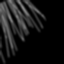

In [8]:
to_pil_image(a[0][3])

In [9]:
from pytorch_lightning.callbacks import ProgressBar

class LitProgressBar(ProgressBar):

    def __init__(self):
        super().__init__()  # don't forget this :)
        self.enable = True

    def disable(self):
        self.enable = False

    def on_train_batch_end(self, trainer, pl_module, outputs, batch, batch_idx):
        super().on_train_batch_end(trainer, pl_module, outputs, batch, batch_idx)  # don't forget this :)
        # percent = (batch_idx / self.total_train_batches) * 100
        # sys.stdout.flush()
        # sys.stdout.write(f'{percent:.01f} percent complete \r')
        pass

bar = LitProgressBar()


In [10]:
runner = Trainer(logger=logger,
                 callbacks=[
                     # LearningRateMonitor(),
                     bar,
                     ModelCheckpoint(save_top_k=3, 
                                     every_n_epochs = 3000,
                                     dirpath =os.path.join(logger.log_dir , "checkpoints"), 
                                     monitor= "val_loss",
                                     save_last= True),
                 ],
                 # strategy=DDPPlugin(find_unused_parameters=False),
                 # strategy="ddp_notebook", 
                 log_every_n_steps = 16,
                 accelerator="gpu", 
                 devices=1,
                 **config['trainer_params'])


Path(f"{logger.log_dir}/Samples").mkdir(exist_ok=True, parents=True)
Path(f"{logger.log_dir}/Reconstructions").mkdir(exist_ok=True, parents=True)


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [11]:
!pwd

/home/jasper/Documents/PhD/Y0/vae_sketch_to_sound/src/PyTorchVAE


In [12]:
runner.fit(experiment, datamodule=data)

You are using a CUDA device ('NVIDIA GeForce RTX 4070 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
/home/jasper/miniforge3/envs/s2s2/lib/python3.10/site-packages/lightning_fabric/loggers/csv_logs.py:198: Experiment logs directory logs/DFCVAE/version_9 exists and is not empty. Previous log files in this directory will be deleted when the new ones are saved!
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type   | Params
---------------------------------
0 | model | DFCVAE | 147 M 
---------------------------------
3.3 M     Trainable params
143 M     Non-trainable params
147 M     Total params
588.099   Total estimated model params size (MB)
`Trainer.fit` stopped: `max_epochs=10000` reached.


In [28]:
logger.log_dir

'logs/BetaVAE/my_exp_name/version_0'

In [15]:
from torchvision.transforms.functional import to_pil_image
from PIL import Image
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [13]:
%cd PyTorchVAE

[Errno 2] No such file or directory: 'PyTorchVAE'
/home/jasper/Documents/PhD/Y0/vae_sketch_to_sound/src/PyTorchVAE


torch.Size([1, 1, 64, 64])


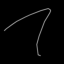

In [16]:
# img = np.array(Image.open('./datasets/crop_640/1/00011_614a_416c.png'))
img = np.array(Image.open('../../datasets/3.png').convert("RGB"))[:,:,0]
img = torch.from_numpy(img).to(device)
# img = 1-img.unsqueeze(0).unsqueeze(0)/255.
img = img.unsqueeze(0).unsqueeze(0)/255.



img = torch.nn.functional.interpolate(img, size=(64,64), mode='bilinear',antialias=True)

# blur = GaussianBlur(3, sigma=1)
# img = blur(img)

print(img.shape)
to_pil_image(img[0])

In [17]:
out = model(img.to(device))

In [124]:
mu, log_var = trained_model.encode(img.to(device))
z = trained_model.reparameterize(mu, log_var).detach().cpu().numpy()

In [125]:
mu

tensor([[-0.5161, -0.3246,  1.7510, -1.1232,  2.1553, -0.9393, -0.9148,  0.8923,
         -1.3707,  0.5278, -0.8792,  0.6021, -0.6998, -0.8677,  1.4106, -2.9050,
         -0.3442,  0.6099,  0.0412, -0.0357,  0.0749, -0.4612, -2.3958,  1.1111,
         -0.0031,  1.8033,  0.7100,  1.2481,  0.2133,  1.0154,  1.6087,  1.2706]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

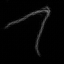

In [18]:
o = torch.clamp(out[0][0], min=0, max=1)
to_pil_image(o.detach().cpu())

In [19]:
out = model(img_data_x[2100:2110].to(device))

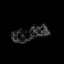

In [20]:
o = torch.clamp(out[0][2], min=0, max=1)
to_pil_image(o.detach().cpu())

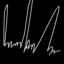

In [23]:
o = torch.clamp(out[1][5], min=0, max=1)
to_pil_image(o.detach().cpu())

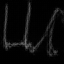

In [22]:
o = torch.clamp(out[0][5], min=0, max=1)
to_pil_image(o.detach().cpu())

In [53]:
out[4]

tensor([[-0.7651, -0.3429,  0.2855,  ...,  2.7808, -0.6138, -0.6194],
        [ 0.7270,  0.2237, -0.3485,  ...,  0.3516, -0.2341, -0.3200],
        [-0.1425,  0.0745,  0.0337,  ..., -1.3222,  0.2490, -0.1188],
        ...,
        [-1.0782,  0.2654,  0.0919,  ..., -1.7245, -1.7932, -0.3616],
        [ 0.2611, -0.1742,  0.1069,  ...,  0.2260, -1.2800, -0.2895],
        [ 1.0433,  0.1376,  0.0130,  ...,  1.9821, -1.2415, -0.2458]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [78]:
%%time
mu, log_var = model.encode(img_data_x[2100:2110].to(device))
z = model.reparameterize(mu, log_var).detach().cpu().numpy()

CPU times: user 2.98 ms, sys: 771 µs, total: 3.76 ms
Wall time: 3.23 ms


In [76]:
dist = np.linalg.norm(z[1]-z[5])
dist

17.039333

In [29]:
trained_model = vae_models[config['model_params']['name']](**config['model_params'])

In [52]:
config['model_params']

{'name': 'DFCVAE', 'in_channels': 1, 'latent_dim': 32}

In [36]:
!pwd

/home/jasper/Documents/PhD/Y0/vae_sketch_to_sound/src/PyTorch-VAE


In [25]:
p = '/home/jasper/Documents/PhD/Y0/vae_sketch_to_sound/src/PyTorchVAE/logs/DFCVAE/version_6/checkpoints/last.ckpt'
checkpoint = torch.load(p)

In [26]:
checkpoint.keys()

dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'loops', 'callbacks', 'optimizer_states', 'lr_schedulers'])

In [88]:
checkpoint['state_dict'].keys()

odict_keys(['model.encoder.0.0.weight', 'model.encoder.0.0.bias', 'model.encoder.0.1.weight', 'model.encoder.0.1.bias', 'model.encoder.0.1.running_mean', 'model.encoder.0.1.running_var', 'model.encoder.0.1.num_batches_tracked', 'model.encoder.1.0.weight', 'model.encoder.1.0.bias', 'model.encoder.1.1.weight', 'model.encoder.1.1.bias', 'model.encoder.1.1.running_mean', 'model.encoder.1.1.running_var', 'model.encoder.1.1.num_batches_tracked', 'model.encoder.2.0.weight', 'model.encoder.2.0.bias', 'model.encoder.2.1.weight', 'model.encoder.2.1.bias', 'model.encoder.2.1.running_mean', 'model.encoder.2.1.running_var', 'model.encoder.2.1.num_batches_tracked', 'model.encoder.3.0.weight', 'model.encoder.3.0.bias', 'model.encoder.3.1.weight', 'model.encoder.3.1.bias', 'model.encoder.3.1.running_mean', 'model.encoder.3.1.running_var', 'model.encoder.3.1.num_batches_tracked', 'model.encoder.4.0.weight', 'model.encoder.4.0.bias', 'model.encoder.4.1.weight', 'model.encoder.4.1.bias', 'model.encoder.4

In [56]:
a = 'model.encoder.0.0.weight'
a = a.split('model.')
a[1]

'encoder.0.0.weight'

In [27]:
keys = list(checkpoint['state_dict'].items())
for k in keys:
    print(k[0])
    checkpoint['state_dict'][k[0].split('model.')[1]] = checkpoint['state_dict'][k[0]]
    del checkpoint['state_dict'][k[0]]
    

model.encoder.0.0.weight
model.encoder.0.0.bias
model.encoder.0.1.weight
model.encoder.0.1.bias
model.encoder.0.1.running_mean
model.encoder.0.1.running_var
model.encoder.0.1.num_batches_tracked
model.encoder.1.0.weight
model.encoder.1.0.bias
model.encoder.1.1.weight
model.encoder.1.1.bias
model.encoder.1.1.running_mean
model.encoder.1.1.running_var
model.encoder.1.1.num_batches_tracked
model.encoder.2.0.weight
model.encoder.2.0.bias
model.encoder.2.1.weight
model.encoder.2.1.bias
model.encoder.2.1.running_mean
model.encoder.2.1.running_var
model.encoder.2.1.num_batches_tracked
model.encoder.3.0.weight
model.encoder.3.0.bias
model.encoder.3.1.weight
model.encoder.3.1.bias
model.encoder.3.1.running_mean
model.encoder.3.1.running_var
model.encoder.3.1.num_batches_tracked
model.encoder.4.0.weight
model.encoder.4.0.bias
model.encoder.4.1.weight
model.encoder.4.1.bias
model.encoder.4.1.running_mean
model.encoder.4.1.running_var
model.encoder.4.1.num_batches_tracked
model.fc_mu.weight
model.

In [94]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [30]:

trained_model.load_state_dict(checkpoint['state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# epoch = checkpoint['epoch']
# loss = checkpoint['loss']

trained_model.eval()
trained_model.to(device)
# - or -
# model.train()

DFCVAE(
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (3): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (4): Sequen

In [31]:
out = trained_model(img_data_x[2100:2110].to(device))

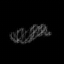

In [32]:
o = torch.clamp(out[0][2], min=0, max=1)
to_pil_image(o.detach().cpu())

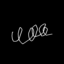

In [33]:
o = torch.clamp(out[1][2], min=0, max=1)
to_pil_image(o.detach().cpu())

In [100]:
%%time
mu, log_var = trained_model.encode(img_data_x[2100:2110].to(device))
z = trained_model.reparameterize(mu, log_var).detach().cpu().numpy()

CPU times: user 3.54 ms, sys: 12.9 ms, total: 16.4 ms
Wall time: 15 ms


In [102]:
z.shape

(10, 32)

In [103]:
%cd ..

/home/jasper/Documents/PhD/Y0/vae_sketch_to_sound/src


In [105]:
from PyTorchVAE.models import *

In [107]:
!cp -av PyTorchVAE/models ./

'PyTorchVAE/models' -> './models'
'PyTorchVAE/models/.ipynb_checkpoints' -> './models/.ipynb_checkpoints'
'PyTorchVAE/models/.ipynb_checkpoints/vanilla_vae-checkpoint.py' -> './models/.ipynb_checkpoints/vanilla_vae-checkpoint.py'
'PyTorchVAE/models/.ipynb_checkpoints/base-checkpoint.py' -> './models/.ipynb_checkpoints/base-checkpoint.py'
'PyTorchVAE/models/.ipynb_checkpoints/__init__-checkpoint.py' -> './models/.ipynb_checkpoints/__init__-checkpoint.py'
'PyTorchVAE/models/.ipynb_checkpoints/beta_vae-checkpoint.py' -> './models/.ipynb_checkpoints/beta_vae-checkpoint.py'
'PyTorchVAE/models/.ipynb_checkpoints/dfcvae-checkpoint.py' -> './models/.ipynb_checkpoints/dfcvae-checkpoint.py'
'PyTorchVAE/models/.ipynb_checkpoints/dfcvae_app-checkpoint.py' -> './models/.ipynb_checkpoints/dfcvae_app-checkpoint.py'
'PyTorchVAE/models/dfcvae_app.py' -> './models/dfcvae_app.py'
'PyTorchVAE/models/__init__.py' -> './models/__init__.py'
'PyTorchVAE/models/base.py' -> './models/base.py'
'PyTorchVAE/models